<a href="https://colab.research.google.com/github/aurnam18/Additional-project/blob/master/Nonlinear_Regression_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Regression (Starter Code)

Import all the required libraries.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline

### The Dataset

The Boston Housing Dataset: The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

Download Boston_Housing.csv from the link below:

[Link to dataset](http://course1.winona.edu/bdeppa/Stat%20425/Datasets.html)

The following command imports the dataset from the file you downloaded:

In [2]:
dataset = pd.read_csv('Boston_Housing.csv')

Let’s explore the data a little bit by checking the number of rows and columns in it.

In [3]:
dataset.shape

(506, 14)

It will give (506, 15) as output which means our dataset has 506 rows and 15 columns.

To see the statistical details of the dataset, we can use describe():

In [4]:
dataset.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 co

CRIM: per capita crime rate by town <br />
ZN: proportion of residential land zoned for lots over 25,000 sq.ft. <br />
INDUS: proportion of non-retail business acres per town. <br />
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br />
NOX: nitric oxides concentration (parts per 10 million) <br />
RM: average number of rooms per dwelling <br />
AGE: proportion of owner-occupied units built prior to 1940 <br />
DIS: weighted distances to five Boston employment centres <br />
RAD: index of accessibility to radial highways <br />
TAX: full-value property-tax rate per 10000 dollars <br />
PTRATIO: pupil-teacher ratio by town <br />
B: 1000 times Bk - 0.63 squared where Bk is the proportion of blacks by town <br />
LSTAT: percent lower status of the population <br />
MEDV: Median value of owner-occupied homes in $1000's

Let us clean our data little bit, So first check which are the columns the contains NaN values in it :

In [5]:
dataset.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using below code.

In [6]:
dataset = dataset.fillna(method='ffill')

### Plot the Data

Next, let's take a look at lstat vs medv.

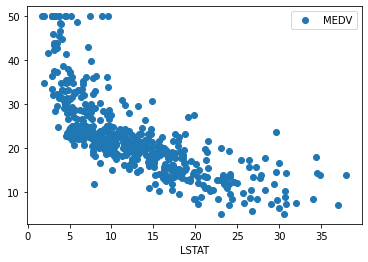

In [7]:
dataset.plot(x='LSTAT', y='MEDV', style='o')
plt.show()

In [ ]:
It looks nonlinear.

### Split up the Dataset Into Attributes and Labels

Our next step is to divide the data into “attributes” and “labels”.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. Our independent variable is lstat and our dependent variable is medv.

We want to predict the median value of the home depending upon the independent variable percent lower status recorded. Therefore our attribute set will consist of "lstat" which is stored in the X variable, and the label will be the “medv” column which is stored in y variable.

In [12]:
X = np.array(dataset['LSTAT'].values).reshape((-1, 1))
y = np.array(dataset['MEDV'].values).reshape((-1, 1))

### Split the Dataset Into Train and Test Data

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Build and Train the Model

Now lets train our linear model.

First, let's create a linear regression model to compare to our polynomial regression model.

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

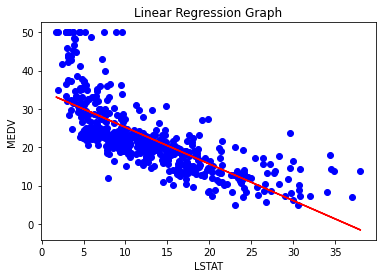

In [15]:
#Visulalize the result for Linear Regression model  
plt.scatter(X,y,color='blue')  
plt.plot(X, lin_reg.predict((X)), color='red')  
plt.title('Linear Regression Graph')  
plt.xlabel('LSTAT')  
plt.ylabel('MEDV') 
plt.show()  

In [18]:
def create_polynomial_regression_model(degree):
    
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y_train)
    
    plt.scatter(X,y,color='blue')  
    plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='red')  
    plt.title('Polynomial Regression Graph')  
    plt.xlabel('LSTAT')  
    plt.ylabel('MEDV') 
    plt.show()  
    
    y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
    return y_pred

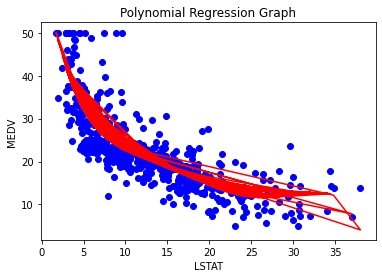

In [36]:
poly_pred = create_polynomial_regression_model(5)

### Make Predictions Using the Model

Now let's do prediction on test data.

In [21]:
y_pred_lin = lin_reg.predict(X_test)
y_pred = poly_pred.flatten()
y_test = y_test.flatten()
y_pred_lin = y_pred_lin.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted Linear': y_pred_lin, 'Predicted Poly': y_pred})
df

,Actual,Predicted Linear,Predicted Poly
0,22.6,27.744574,27.501142
1,50.0,25.649866,23.568974
2,23.0,24.722073,22.119457
3,8.3,15.855433,14.868238
4,21.2,22.962136,19.809043
...,...,...,...
97,24.7,29.246259,30.940566
98,14.1,17.424072,15.503909
99,18.7,22.187381,18.958182
100,28.1,25.793339,23.808427


### Evaluate the Model

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE.

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.141076675301033
Mean Squared Error: 37.22424226843414
Root Mean Squared Error: 6.101167287366749


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

Mean Absolute Error: 4.864010561669802
Mean Squared Error: 46.336305360025925
Root Mean Squared Error: 6.807077593213252


In [ ]:
# Make a conclusion about how accurate and trustworthy the algorithm is HERE.